In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import osmnx as ox

df = pd.read_csv("C:/Users/seema/OneDrive/Desktop/18th/Data.csv")
print(df.columns)
df1= pd.read_csv("C:/Users/seema/OneDrive/Desktop/18th/State_data.csv")
df1.rename(columns={'State':'state'},inplace="True")
print(df1.columns)
df_2 = pd.read_csv("C:/Users/seema/OneDrive/Desktop/18th/NCAP_Funding.csv")
df_2.rename(columns={'State':'state'},inplace="True")
print(df_2.columns)

# Spatial aggregations

### Question 1

In [11]:
df=pd.read_csv("E:/psdvdatasets/Data.csv")
df1=pd.read_csv("C:/Users/LENOVO/OneDrive/Desktop/coding/PSDV-3/State_data.csv")
df2=pd.read_csv("C:/Users/LENOVO/OneDrive/Desktop/coding/PSDV-3/NCAP_Funding.csv")


df["PM2.5"]=df.groupby("state")["PM2.5"].transform(lambda x: x.fillna(x.median()))
avgforstate=df.groupby("state")["PM2.5"].mean()


print(f"The state with highest average level of PM2.5 concentration is {avgforstate.idxmax()}, with concentration of {avgforstate[avgforstate.idxmax()]:.3f} units.")

The state with highest average level of PM2.5 concentration is Delhi, with concentration of 99.233 units.


### Question 2

In [3]:
df["Timestamp"]=pd.to_datetime(df["Timestamp"])

df2023=df[df["Timestamp"].dt.year==2023]

hazardous_days=df2023[df2023["PM2.5"]>300]
statewise_hazardous_count=df2023.groupby("state")["Timestamp"].nunique()
print(statewise_hazardous_count)
if not statewise_hazardous_count.empty:
    most_hazardous_state = statewise_hazardous_count.idxmax()
    max_hazardous_days = statewise_hazardous_count[most_hazardous_state]
    print(f"State with most number of hazardous days in 2023 was {most_hazardous_state} with {max_hazardous_days} hazardous days.")
else:
    print("No hazardous days recorded in 2023.")

# print(f"State with most number of hazardous days in 2023 was {statewise__hazardous_count.idxmax()} with {statewise__hazardous_count[statewise__hazardous_count.idxmax()]} hazardous days.")

state
Andhra Pradesh       365
Arunachal Pradesh    365
Assam                365
Bihar                365
Chandigarh           365
Chhattisgarh         365
Delhi                365
Gujarat              365
Haryana              365
Himachal Pradesh     365
Jammu and Kashmir    365
Jharkhand            365
Karnataka            365
Kerala               365
Madhya Pradesh       365
Maharashtra          365
Manipur              365
Meghalaya            365
Mizoram              365
Nagaland             365
Odisha               365
Puducherry           365
Punjab               365
Rajasthan            365
Sikkim               365
Tamil Nadu           365
Telangana            365
Tripura              365
Uttar Pradesh        365
Uttarakhand          365
West Bengal          365
Name: Timestamp, dtype: int64
State with most number of hazardous days in 2023 was Andhra Pradesh with 365 hazardous days.


### Question 3

In [4]:
statewise_standarddev=df.groupby("state")["PM2.5"].std()

print(f"State with most variability of PM2.5 concentration is {statewise_standarddev.idxmax()}, with a standard deviation of {statewise_standarddev[statewise_standarddev.idxmax()]}")

State with most variability of PM2.5 concentration is Delhi, with a standard deviation of 77.38186293185419


### Question 4

In [5]:
df_covid=df[(df["Timestamp"].dt.year==2020) | (df["Timestamp"].dt.year==2021)]
statewise_average=df_covid.groupby("state")["PM2.5"].mean()
print(f"The state with lowest average levels of PM2.5 in covid period was {statewise_average.idxmin()} with an average of {statewise_average[statewise_average.idxmin()]:.3f}")

The state with lowest average levels of PM2.5 in covid period was Sikkim with an average of 8.107


# Temporal aggregation

### Question 1

In [11]:
august_2020=df[(df["Timestamp"].dt.year==2020) & (df["Timestamp"].dt.month==8)]
stationwise_max=august_2020.groupby("station")["PM2.5"].max()
print(f"The station which recorded the highest value of PM2.5 for the month of Aug 2020 was {stationwise_max.idxmax()} with a value of {stationwise_max[stationwise_max.idxmax()]}")

The station which recorded the highest value of PM2.5 for the month of Aug 2020 was Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB with a value of 805.51


### Question 2

In [7]:
winter_2018=df[((df["Timestamp"].dt.month==12)|(df["Timestamp"].dt.month==1)|(df["Timestamp"].dt.month==2))&(df["Timestamp"].dt.year==2018)&(df["station"]=="Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")]
winter_average=winter_2018["PM2.5"].mean()
print(f"Average PM2.5 levels in winters of 2018 were {winter_average} units.")

summer_2018=df[((df["Timestamp"].dt.month==3)|(df["Timestamp"].dt.month==4)|(df["Timestamp"].dt.month==5))&(df["Timestamp"].dt.year==2018)&(df["station"]=="Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")]
summer_average=summer_2018["PM2.5"].mean()
print(f"Average PM2.5 levels in summer of 2018 were {summer_average} units.")

monsoon_2018=df[((df["Timestamp"].dt.month==6)|(df["Timestamp"].dt.month==7)|(df["Timestamp"].dt.month==8)|(df["Timestamp"].dt.month==9))&(df["Timestamp"].dt.year==2018)&(df["station"]=="Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")]
monsoon_average=monsoon_2018["PM2.5"].mean()
print(f"Average PM2.5 levels in monsoon of 2018 were {monsoon_average} units.")

Average PM2.5 levels in winters of 2018 were 37.9452796623679 units.
Average PM2.5 levels in summer of 2018 were 23.171747311827957 units.
Average PM2.5 levels in monsoon of 2018 were 25.754506053120885 units.


### Question 3

daytype,weekday,weekend
month,,
1,38.486305,28.963720
2,58.604256,53.946216
3,51.942440,53.167747
4,31.690971,32.288449
5,19.663661,20.744797
6,10.153939,7.695810
7,10.569553,8.652231
8,23.171747,23.171747
9,23.171747,23.171747


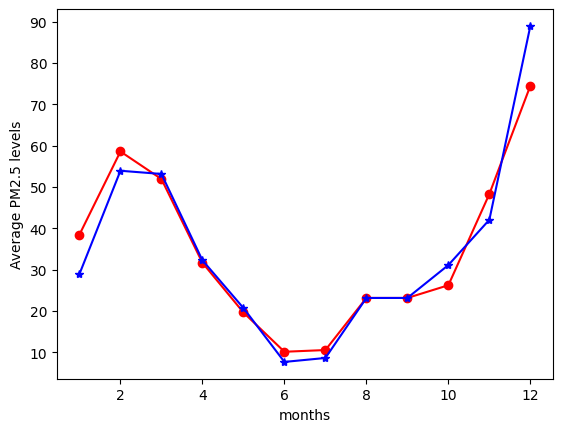

In [7]:
# filtering data according to year and given station:
data_2021=df[(df["Timestamp"].dt.year==2021)&(df["station"]=="Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")]

# adding extra column to identify days: 
data_2021=data_2021.copy()
data_2021["daytype"]=data_2021["Timestamp"].dt.dayofweek.apply(lambda x: "weekday" if x<5 else "weekend")

#adding column to define month: 
data_2021["month"]=data_2021["Timestamp"].dt.month

# grouping data on the basis of month and daytype : 
monthwise_data=data_2021.groupby(["month","daytype"])["PM2.5"].mean().unstack()
display(monthwise_data)

#plotting the graph:
x=monthwise_data.index
y1=monthwise_data["weekday"]
y2=monthwise_data["weekend"]


plt.plot(x,y1,color="red",marker="o")
plt.plot(x,y2,color="blue",marker="*")
plt.xlabel("months")
plt.ylabel("Average PM2.5 levels")
plt.show()

# spatio-temporal aggregations

### Question 1

In [5]:
df_2022 = df[df['Timestamp'].dt.year == 2022].copy()


df_2022["PM2.5"]=df_2022.groupby("state")["PM2.5"].transform(lambda x: x.fillna(x.median()))


df_2022["Month"] = df_2022["Timestamp"].dt.month


summer_months = [3, 4, 5]
monsoon_months = [6, 7, 8, 9]


summer_avg = df_2022[df_2022["Month"].isin(summer_months)].groupby("state")["PM2.5"].mean()
monsoon_avg = df_2022[df_2022["Month"].isin(monsoon_months)].groupby("state")["PM2.5"].mean()


seasonal_avg = pd.DataFrame({"Summer_Avg": summer_avg, "Monsoon_Avg": monsoon_avg})

seasonal_avg["Percentage_Change"] = ((seasonal_avg["Monsoon_Avg"] - seasonal_avg["Summer_Avg"]) / seasonal_avg["Summer_Avg"]) * 100
most_diff_state = seasonal_avg["Percentage_Change"].abs().idxmax()
most_diff_value = seasonal_avg.loc[most_diff_state, "Percentage_Change"]
   
print(f"State with the most PM2.5 difference: {most_diff_state}")
print(f"Percentage Change: {most_diff_value:.2f}%")


State with the most PM2.5 difference: Mizoram
Percentage Change: -58.52%


### Question 2

Season    Monsoon     Summer      Winter
Year                                    
2017    71.932723  81.150701  102.394469
2018    55.486503  88.821439  156.459438
2019    49.189570  84.243686  170.053413
2020    42.834881  57.059707  151.563309
2021    43.911614  78.018191  176.233349
2022    45.371365  95.060007  144.567163
2023    44.726961  70.527172  161.769980
2024    44.071004  80.363532  146.348378


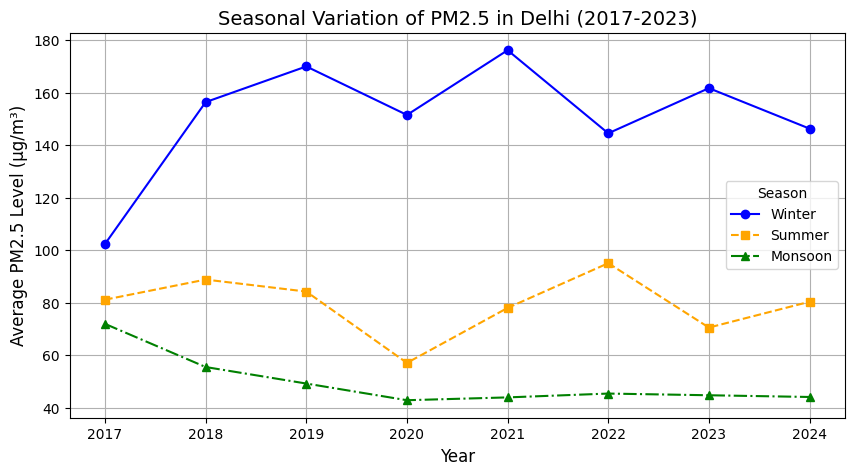

In [6]:

df_delhi = df[df['state'].str.contains("Delhi", case=False, na=False)].copy()


df_delhi["Year"] = df_delhi["Timestamp"].dt.year 
df_delhi["Month"] = df_delhi["Timestamp"].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8, 9]:
        return "Monsoon"
    else:
        return "Other"


df_delhi["Season"] = df_delhi["Month"].apply(get_season)

df_delhi = df_delhi[df_delhi["Season"] != "Other"]

seasonal_avg = df_delhi.groupby(["Year", "Season"])["PM2.5"].mean().reset_index()

seasonal_pivot = seasonal_avg.pivot(index="Year", columns="Season", values="PM2.5")
print(seasonal_pivot)

plt.figure(figsize=(10, 5))

plt.plot(seasonal_pivot.index, seasonal_pivot["Winter"], marker="o", linestyle="-", label="Winter", color="blue")
plt.plot(seasonal_pivot.index, seasonal_pivot["Summer"], marker="s", linestyle="--", label="Summer", color="orange")
plt.plot(seasonal_pivot.index, seasonal_pivot["Monsoon"], marker="^", linestyle="-.", label="Monsoon", color="green")

plt.title("Seasonal Variation of PM2.5 in Delhi (2017-2023)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average PM2.5 Level (µg/m³)", fontsize=12)
plt.legend(title="Season")
plt.grid(True)

plt.show()


### Question 3

<Figure size 1200x600 with 0 Axes>

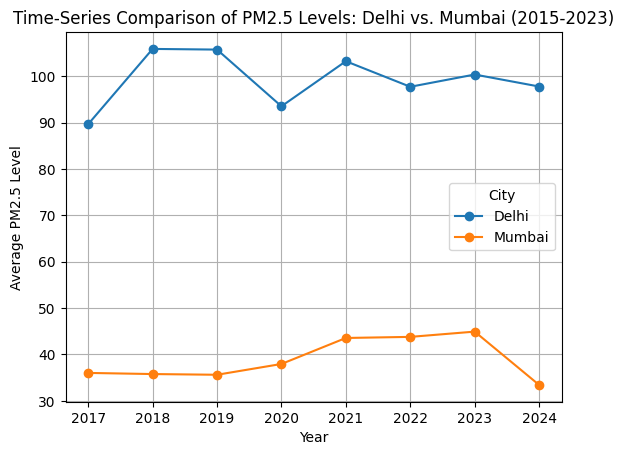

Delhi had more fluctuations in PM2.5 levels.


In [27]:
df_cities = df[df["city"].isin(["Delhi", "Mumbai"])].copy()
df_cities["Year"] = df_cities["Timestamp"].dt.year


time_series_pm25 = df_cities.groupby(["Year", "city"])["PM2.5"].mean().unstack()


plt.figure(figsize=(12, 6))
time_series_pm25.plot(kind="line", marker="o")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level")
plt.title("Time-Series Comparison of PM2.5 Levels: Delhi vs. Mumbai (2015-2023)")
plt.legend(title="City")
plt.grid(True)
plt.show()


delhi_variability = time_series_pm25["Delhi"].std()
mumbai_variability = time_series_pm25["Mumbai"].std()

if delhi_variability > mumbai_variability:
    print("Delhi had more fluctuations in PM2.5 levels.")
else:
    print("Mumbai had more fluctuations in PM2.5 levels.")

# Population based

### Question 1

In [14]:
stations_per_state = df.groupby("state")["station"].nunique().reset_index()

# Rename the 'station' column to 'num_stations'

stations_per_state = stations_per_state.rename(columns={"station": "num_stations"})

# Fill missing station counts with 0 (assume no reported stations)
stations_per_state["num_stations"] = stations_per_state["num_stations"].fillna(0)

# Fill missing population values with the median state population
df1["Population"] = df1["Population"].fillna(df1["Population"].median())

# Merge with state population data
merged_df = pd.merge(stations_per_state, df1, on="state", how="inner")

# Compute monitoring stations per million people
merged_df["stations_per_million"] = (merged_df["num_stations"] / merged_df["Population"]) * 1000000

# Identify the state with the highest number of stations per million people
most_monitored_state = merged_df.loc[merged_df["stations_per_million"].idxmax()]b

# Print the result
print(f"State with the highest number of monitoring stations per million people: {most_monitored_state['state']} with {most_monitored_state['stations_per_million']:.2f} stations per million people")


KeyError: 'state'

### Question 2

In [16]:

# Step 2: Handle missing values in df (air quality data)
# For PM2.5, we fill NaN with the median of each state's PM2.5 values
df['PM2.5'] = df.groupby('state')['PM2.5'].transform(lambda x: x.fillna(x.median()))

# Step 3: Handle missing values in df1 (state population data)
# For Population, we fill NaN with the median population for that state
df1['Population'] = df1['Population'].fillna(df1['Population'].median())

# Step 4: Calculate total PM2.5 exposure by state
state_pm25 = df.groupby('state')['PM2.5'].sum().reset_index()

# Step 5: Merge state data with population info
state_pm25 = state_pm25.merge(df1[['state', 'Population']], on='state', how='left')

# Step 6: Handle any remaining NaN values after the merge (if any)
# If any state population is still NaN, we can fill it with the global median or other logic
state_pm25['Population'] = state_pm25['Population'].fillna(state_pm25['Population'].median())

# Step 7: Calculate per capita PM2.5 exposure
state_pm25['per_capita_pm25'] = state_pm25['PM2.5'] / state_pm25['Population']

# Step 8: Sort and select top 5 states
top_5_states = state_pm25.sort_values(by='per_capita_pm25', ascending=False).head(5)

# Step 9: Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_5_states['state'], top_5_states['per_capita_pm25'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Per Capita PM2.5 Exposure')
plt.title('Top 5 Most Polluted States (Per Capita PM2.5 Exposure) in 2023')
plt.xticks(rotation=45)
plt.show()


KeyError: "['state'] not in index"

### Question 3

In [17]:


# Step 2: Handle missing values in df (air quality data)
# For PM2.5, we fill NaN with the median of each state's PM2.5 values
df['PM2.5'] = df.groupby('state')['PM2.5'].transform(lambda x: x.fillna(x.median()))

# Step 3: Handle missing values in df1 (state population and area data)
# Fill missing Population values with the median population of the state
df1['Population'] = df1['Population'].fillna(df1['Population'].median())

# Fill missing Area values with the median area of the state (if necessary)
df1['Area (km2)'] = df1['Area (km2)'].fillna(df1['Area (km2)'].median())

# Step 4: Calculate average PM2.5 concentration by state
avg_pm25 = df.groupby('state')['PM2.5'].mean().reset_index()

# Step 5: Calculate population density (people per square kilometer)
df1['Population Density'] = df1['Population'] / df1['Area (km2)']

# Step 6: Merge the two datasets on 'state' to combine the population density and average PM2.5 data
state_data = avg_pm25.merge(df1[['state', 'Population Density']], on='state', how='left')

# Step 7: Plot the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population Density', y='PM2.5', data=state_data, color='blue', s=100)

# Step 8: Label the axes and add a title
plt.xlabel('Population Density (people per km²)')
plt.ylabel('Average PM2.5 Concentration')
plt.title('Relationship between Population Density and Average PM2.5 Concentration by State')

# Step 9: Show the plot
plt.show()


KeyError: "['state'] not in index"

# area based

### Question 1

In [18]:

# Step 4: Calculate total PM2.5 exposure by state
total_pm25 = df.groupby('state')['PM2.5'].sum().reset_index()

# Step 5: Calculate PM2.5 concentration per square kilometer
df1['PM2.5 per km²'] = total_pm25['PM2.5'] / df1['Area (km2)']

# Step 6: Merge total PM2.5 exposure data with state data to get PM2.5 per km²
state_pollution = df1[['state', 'PM2.5 per km²']]

# Step 7: Identify the state with the highest PM2.5 concentration per square kilometer
highest_pollution_state = state_pollution.loc[state_pollution['PM2.5 per km²'].idxmax()]
print(f"The state with the highest PM2.5 concentration per square kilometer is {highest_pollution_state['state']} with a value of {highest_pollution_state['PM2.5 per km²']:.2f} µg/m³/km².")

# Step 8: Plot the pollution levels for all states relative to their area
plt.figure(figsize=(14, 8))
plt.bar(state_pollution['state'], state_pollution['PM2.5 per km²'], color='lightcoral')
plt.xlabel('State')
plt.ylabel('PM2.5 Concentration per km² (µg/m³/km²)')
plt.title('PM2.5 Concentration per Square Kilometer for Each State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


KeyError: "['state'] not in index"

### Question 2

In [19]:
stations_per_state = df.groupby('state')['station'].nunique().reset_index()

# Ensure 'state' is a valid index in df1 and handle missing areas
df1 = df1.set_index('state')

# Fill NaN values in 'Area (km2)' with a default value (e.g., 1 to avoid division by zero)
df1['Area (km2)'] = df1['Area (km2)'].fillna(1)  # Avoid NaN errors

# Step 4: Calculate the number of monitoring stations per square kilometer
stations_per_state['Stations per km²'] = stations_per_state['state'].map(df1['Area (km2)'])
stations_per_state['Stations per km²'] = stations_per_state['station'] / stations_per_state['Stations per km²']

# Step 5: Identify the state with the highest density of monitoring stations
highest_density_state = stations_per_state.loc[stations_per_state['Stations per km²'].idxmax()]

print(f"The state with the highest density of monitoring stations per square kilometer is {highest_density_state['state']} with {highest_density_state['Stations per km²']:.4f} stations/km².")

# Step 6: Plot the number of monitoring stations per square kilometer for each state
plt.figure(figsize=(14, 8))
plt.bar(stations_per_state['state'], stations_per_state['Stations per km²'], color='lightblue')
plt.xlabel('State')
plt.ylabel('Stations per Square Kilometer')
plt.title('Monitoring Stations per Square Kilometer by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



KeyError: "None of ['state'] are in the columns"

### Question 3

In [20]:

# Step 2: Filter the data for the year 2021
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_2021 = df[df['Timestamp'].dt.year == 2021]

# Step 3: Calculate average PM2.5 levels for Maharashtra and Madhya Pradesh
pm25_maharashtra = df_2021[df_2021['state'] == 'Maharashtra']['PM2.5'].mean()
pm25_madhya_pradesh = df_2021[df_2021['state'] == 'Madhya Pradesh']['PM2.5'].mean()

# Step 4: Get population and area data for both states
maharashtra_population = df1[df1['state'] == 'Maharashtra']['Population'].values[0]
maharashtra_area = df1[df1['state'] == 'Maharashtra']['Area (km2)'].values[0]
madhya_pradesh_population = df1[df1['state'] == 'Madhya Pradesh']['Population'].values[0]
madhya_pradesh_area = df1[df1['state'] == 'Madhya Pradesh']['Area (km2)'].values[0]

# Step 5: Calculate population density for both states
maharashtra_density = maharashtra_population / maharashtra_area
madhya_pradesh_density = madhya_pradesh_population / madhya_pradesh_area

# Step 6: Output the results
print(f"Average PM2.5 level for Maharashtra in 2021: {pm25_maharashtra:.2f} µg/m³")
print(f"Average PM2.5 level for Madhya Pradesh in 2021: {pm25_madhya_pradesh:.2f} µg/m³")
print(f"Population Density of Maharashtra: {maharashtra_density:.2f} people/km²")
print(f"Population Density of Madhya Pradesh: {madhya_pradesh_density:.2f} people/km²")

# Step 7: Plot the results for PM2.5 levels
states = ['Maharashtra', 'Madhya Pradesh']
pm25_levels = [pm25_maharashtra, pm25_madhya_pradesh]
pop_density = [maharashtra_density, madhya_pradesh_density]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PM2.5 levels
ax1.bar(states, pm25_levels, color='skyblue', label='Average PM2.5 (µg/m³)', alpha=0.7)
ax1.set_xlabel('State')
ax1.set_ylabel('Average PM2.5 (µg/m³)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis for population density
ax2 = ax1.twinx()
ax2.plot(states, pop_density, color='orange', label='Population Density (people/km²)', marker='o', linestyle='--')
ax2.set_ylabel('Population Density (people/km²)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title
plt.title('Comparison of PM2.5 Levels and Population Density in Maharashtra and Madhya Pradesh (2021)')
plt.tight_layout()
plt.show()


KeyError: 'state'

# funding based

### Question 1

df["Timestamp"] = pd.to_datetime(df["Timestamp"])
pollution_2021 = df[df["Timestamp"].dt.year == 2021]

state_pm25_avg = pollution_2021.groupby("state")["PM2.5"].mean().reset_index()

state_funding = df_2.groupby("state")["Total fund released"].sum().reset_index()

state_pm25_avg = state_pm25_avg.merge(state_funding, on="state", how="left")

state_pm25_avg["NCAP Funded"] = state_pm25_avg["Total fund released"].fillna(0) > 0

avg_pm25_funded = state_pm25_avg[state_pm25_avg["NCAP Funded"]]["PM2.5"].mean()
avg_pm25_non_funded = state_pm25_avg[~state_pm25_avg["NCAP Funded"]]["PM2.5"].mean()

print(f"Average PM2.5 in NCAP-funded states: {avg_pm25_funded:.2f}")
print(f"Average PM2.5 in non-funded states: {avg_pm25_non_funded:.2f}")

plt.figure(figsize=(6, 5))
plt.bar(["NCAP Funded", "Non-Funded"], [avg_pm25_funded, avg_pm25_non_funded], color=["green", "red"])
plt.show()

### Question 2

In [23]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

for col in ["Amount released during FY 2019-20", "Amount released during FY 2020-21", "Amount released during FY 2021-22", "Total fund released"]:
    df_2[col] = pd.to_numeric(df_2[col], errors="coerce")

assam_pm25 = df[df["state"] == "Assam"].copy()
assam_pm25["Year"] = assam_pm25["Timestamp"].dt.year 
pm25_trend = assam_pm25.groupby("Year")["PM2.5"].mean().reset_index()

assam_funding = df_2[df_2["state"] == "Assam"]

funding_by_year = pd.DataFrame({
    "Year": [2019, 2020, 2021],  
    "Total fund released": [
        assam_funding["Amount released during FY 2019-20"].sum(),
        assam_funding["Amount released during FY 2020-21"].sum(),
        assam_funding["Amount released during FY 2021-22"].sum()
    ]
})

assam_trend = pm25_trend.merge(funding_by_year, on="Year", how="left")
assam_trend = assam_trend[assam_trend["Year"].isin([2019, 2020, 2021])]


fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.set_xlabel("Year")
ax1.set_ylabel("Average PM2.5 Level", color="red")
ax1.plot(assam_trend["Year"], assam_trend["PM2.5"], marker="o", color="red", label="PM2.5 Level")
ax1.tick_params(axis="y", labelcolor="red")

ax2 = ax1.twinx()
ax2.set_ylabel("NCAP Funding (Crores)", color="blue")
ax2.bar(assam_trend["Year"], assam_trend["Total fund released"], alpha=0.5, color="blue", label="NCAP Funding")
ax2.tick_params(axis="y", labelcolor="blue")

plt.title("PM2.5 Levels vs. NCAP Funding in Assam (Time Series)")
fig.tight_layout()
plt.show()

NameError: name 'df_2' is not defined

### Question 3

In [24]:
for col in ["Total fund released"]:
    df_2[col] = pd.to_numeric(df_2[col], errors="coerce")

state_funding = df_2.groupby("state")["Total fund released"].sum().reset_index()
state_funding = state_funding.merge(df1, on="state", how="left") 

plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=state_funding,
    x="Area (km2)", 
    y="Total fund released", 
    hue="state",  
    palette="tab20",
    s=100,  
    edgecolor="black"
)
plt.show()

NameError: name 'df_2' is not defined

# Miscellaneous Questions 

### Question 1

In [29]:
# finding most polluted city in 2023: 
df_2023=df[df["Timestamp"].dt.year==2023]
cities_average=df_2023.groupby("city")["PM2.5"].mean()
print(f"The most polluted city in the year 2023 was {cities_average.idxmax()}, with an average level of pm2.5 equal to {cities_average[cities_average.idxmax()]} units.")

#finding number of hazardous days for the most polluted city: 
mpcity=cities_average.idxmax()
mpcity_data=df[df["city"]==mpcity]
hazardous_days=mpcity_data[mpcity_data["PM2.5"]>300]
hazardous_days_count=hazardous_days["Timestamp"].nunique()
print(f"Number of hazardous days: {hazardous_days_count}")

The most polluted city in the year 2023 was Byrnihat, with an average level of pm2.5 equal to 144.82928933275244 units.
Number of hazardous days: 17


### Question 2

Average PM2.5 levels during diwali were 59.039800328530184 units.
Average PM2.5 levels during New year were 73.71580818128537 units.
Average PM2.5 levels in rest of the year were 44.62636438400029 units.


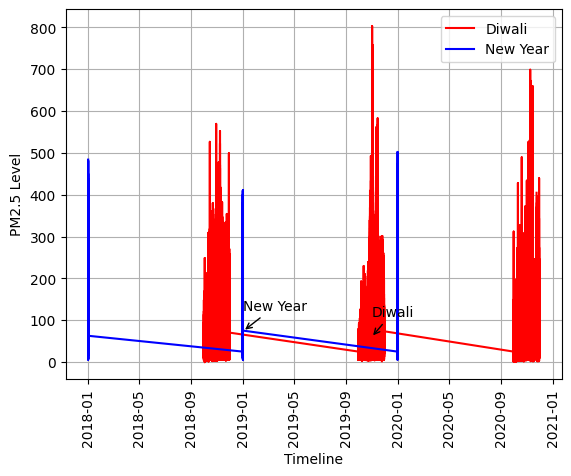

In [7]:
df["month"]=df["Timestamp"].dt.month
df["year"]=df["Timestamp"].dt.year

df_diwali=df[(df["month"].isin([10,11]))&(df["year"].isin([2018,2019,2020]))]
diwali_average=df_diwali["PM2.5"].mean()
print(f"Average PM2.5 levels during diwali were {diwali_average} units.")

df_newyear=df[(df["Timestamp"].dt.month==1)&(df["Timestamp"].dt.day==1)&(df["year"].isin([2018,2019,2020]))]
newyear_average=df_newyear["PM2.5"].mean()
print(f"Average PM2.5 levels during New year were {newyear_average} units.")

df_normal=df[(df["month"].isin([2,3,4,5,6,7,8,9,12]))&(df["year"].isin([2018,2019,2020]))]
normal_average=df_normal["PM2.5"].mean()
print(f"Average PM2.5 levels in rest of the year were {normal_average} units.")

plt.plot(df_diwali["Timestamp"], df_diwali["PM2.5"], color="red", label="Diwali")
plt.annotate("Diwali", xy=(df_diwali["Timestamp"].median(), diwali_average),xytext=(df_diwali["Timestamp"].median(), diwali_average + 50),arrowprops=dict(facecolor="red", arrowstyle="->"))

plt.plot(df_newyear["Timestamp"], df_newyear["PM2.5"], color="blue", label="New Year")
plt.annotate("New Year", xy=(df_newyear["Timestamp"].median(), newyear_average),xytext=(df_newyear["Timestamp"].median(), newyear_average + 50),arrowprops=dict(facecolor="blue", arrowstyle="->"))

plt.xlabel("Timeline")
plt.ylabel("PM2.5 Level")
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### Question 3

In [25]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

df_2["Amount released during FY 2020-21"] = pd.to_numeric(df_2["Amount released during FY 2020-21"], errors="coerce")

highest_funded_state = df_2.groupby("state")["Amount released during FY 2020-21"].sum().idxmax()
print(f"State with highest NCAP funding in 2020: {highest_funded_state}")

state_pm25 = df[df["state"] == highest_funded_state].copy()

state_pm25["Year"] = state_pm25["Timestamp"].dt.year
pm25_trend = state_pm25.groupby("Year")["PM2.5"].mean().reset_index()

pm25_trend = pm25_trend[pm25_trend["Year"].isin([2020, 2021, 2022, 2023])]

plt.figure(figsize=(10, 5))
plt.plot(pm25_trend["Year"], pm25_trend["PM2.5"], marker="o", linestyle="-", color="red", label=f"{highest_funded_state} PM2.5 Trend")

funding_2020 = df_2[df_2["state"] == highest_funded_state]["Amount released during FY 2020-21"].sum()
plt.annotate(f"Funding: {funding_2020} Cr", xy=(2020, pm25_trend[pm25_trend['Year'] == 2020]["PM2.5"].values[0]),
             xytext=(2020, pm25_trend["PM2.5"].max()), arrowprops=dict(facecolor="blue", arrowstyle="->"), fontsize=10)

plt.xlabel("Year")
plt.ylabel("Average PM2.5 (µg/m^3)")
plt.title(f"Air Quality Trend in {highest_funded_state} (2020-2023)")
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'df_2' is not defined

### Question 4

In [26]:
india_boundary=ox.geocode_to_gdf("India")
sensor_locations=df[['latitude', 'longitude', 'station']].dropna()

fig, ax=plt.subplots(figsize=(10, 10))
india_boundary.plot(ax=ax, color='lightgreen', edgecolor='black')
ax.scatter(sensor_locations['longitude'], sensor_locations['latitude'], 
           color='black', marker='^', s=50, edgecolors='white', label='Sensor Locations')
ax.set_title('Sensor Locations in India', fontsize=12)
ax.legend(loc='upper right')
plt.show()

NameError: name 'ox' is not defined

# tell me something new

In [28]:
# Step 1: Remove NaN values from relevant columns
df = df.dropna(subset=['city', 'PM2.5', 'station'])

# Step 2: Compute average PM2.5 for each city
city_avg_pm25 = df.groupby('city')['PM2.5'].mean().reset_index()

# Step 3: Count monitoring stations per city
stations_per_city = df.groupby('city')['station'].nunique().reset_index()

# Step 4: Merge both metrics
city_analysis = city_avg_pm25.merge(stations_per_city, on='city')

# Step 5: Avoid division by zero by ensuring no city has 0 stations
city_analysis = city_analysis[city_analysis['station'] > 0]

# Step 6: Compute PM2.5 per monitoring station
city_analysis['PM2.5 per station'] = city_analysis['PM2.5'] / city_analysis['station']

# Step 7: Find under-monitored cities (high pollution, few stations)
under_monitored = city_analysis[
    (city_analysis['PM2.5'] > city_analysis['PM2.5'].median()) & 
    (city_analysis['station'] < city_analysis['station'].median())
]

# Step 8: Sort by PM2.5 per station (higher means worse monitoring)
under_monitored = under_monitored.sort_values(by='PM2.5 per station', ascending=False)

# Display top 10 under-monitored cities
print("Cities with High Pollution but Low Monitoring:")
print(under_monitored[['city', 'PM2.5', 'station', 'PM2.5 per station']].head(10))


Cities with High Pollution but Low Monitoring:
Empty DataFrame
Columns: [city, PM2.5, station, PM2.5 per station]
Index: []
